In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from synchronization import processing

In [34]:
time = np.arange(0, 20, 0.1)

amplitude = np.sin(time)
amplitude_2 = np.sin(time * 4 + np.pi )
amplitude_3 = np.sin(time)

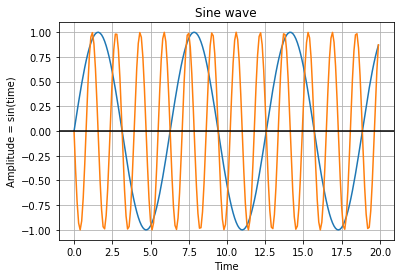

In [35]:
plt.plot(time, amplitude)
plt.plot(time, amplitude_2)
# plt.plot(time, amplitude_3)

plt.title('Sine wave')
plt.xlabel('Time')

plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

plt.show()

In [36]:
signals = [amplitude, amplitude_2]

In [37]:
# signals = [s - np.mean(s) for s in signals]

# compute analytical signal and take angle to get phase
phases = [np.unwrap(np.angle(hilbert(s))) for s in signals]

# transform to complex phase to prepare for averaging
complex_phase = [np.exp(1j * phase) for phase in phases]

# take the average (sum up all complex phases and divide by number of phases)
# average over each time point
# afterwards we have a vector of (1, #neurons), each entry is the average complex phase at a timepoint
avg = sum(complex_phase) / len(complex_phase)

# length of complex number
phi = np.abs(avg)

# average of order parameter
local_order_parameter = sum(phi) / len(phi)
average_angle = sum(avg) / len(avg)

print("Kuramto Order Parameter", local_order_parameter)

Kuramto Order Parameter 0.637609717582905


In [38]:
# Mean phase coherence
# * for constant phase differences over trials or time, we get a phase coherence of 1.
# * if phase difference varies over time signals are less coherent and coherence moves towards 0.
phase_coherence = processing.mean_phase_coherence(signals[0], signals[1])
print("Average phase coherence of: ", phase_coherence)

Average phase coherence of:  0.03667694965042144


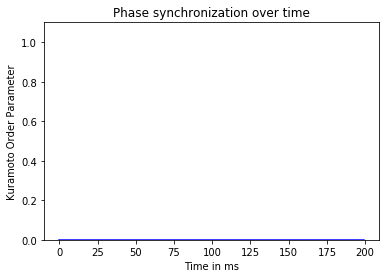

In [23]:
plt.title(f"Phase synchronization over time")
plt.xlabel("Time in ms")
plt.ylim(0, 1.1)
plt.ylabel("Kuramoto Order Parameter")
plt.plot(phi, c="blue")

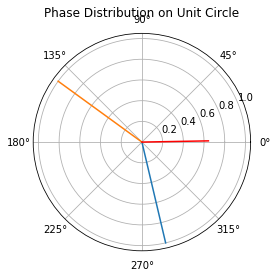

In [16]:
# angle of phases on unit circle, therefore each phase has length 1
# we calculate the Kuramoto order parameter and plot its angle and length. The length expresses the phase sycnrhonization.
# Order Parameter is in [0-1].

plt.axes(polar=True)
plt.title("Phase Distribution on Unit Circle")

for phase in phases[:50]:
    plt.plot((0, phase[1]), (0, 1))

# plot the average phase vector
# length of vector expresses the consistency
plt.plot((0, average_angle), (0, local_order_parameter), c='red')

plt.show()